In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

In [31]:
#let's look and see what kind of results we get when we sample from numpy
sample = np.random.randn(1000)
sample

array([ 2.55397032e-01,  3.43205155e-01,  6.37853125e-01,  7.38951243e-01,
       -3.14204648e-01, -7.94906409e-01,  8.40111944e-01,  7.91275924e-03,
        1.01799053e+00,  2.24421442e-01, -1.31873469e+00, -1.91485601e-01,
       -1.46345717e+00, -1.76212031e+00, -5.69618424e-01, -9.77775362e-01,
       -7.15600285e-01, -4.02748910e-01, -8.45913992e-01,  2.14096443e-01,
        9.37810591e-01, -5.22945049e-01,  7.04019636e-01, -5.53299935e-01,
        1.43335545e-01,  8.57871316e-01, -7.42023401e-01, -1.91213343e-01,
       -4.05108501e-01,  3.44761682e-01,  1.17218970e+00, -9.48125369e-01,
       -2.67906595e-02,  7.83446977e-02, -3.31537153e-01, -1.23044964e+00,
       -1.68338375e+00,  1.42585543e-01, -8.86874805e-01,  9.05650203e-01,
       -2.44963090e-02,  1.82334447e-01,  9.44941440e-02,  3.02954884e-01,
       -8.94759508e-02, -1.60975850e-02, -7.35128239e-02,  5.40950003e-03,
       -1.65553143e+00, -9.42054079e-01,  1.06443687e+00, -1.16109734e-01,
        6.52820202e-01,  

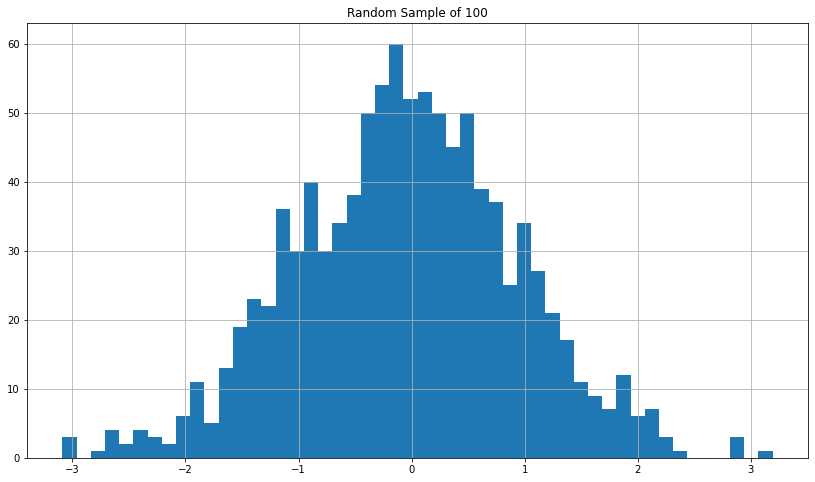

In [34]:
plt.figure(figsize = (14, 8))
plt.hist(sample, bins = 50)
plt.grid()
plt.title("Random Sample of 100")
plt.show()

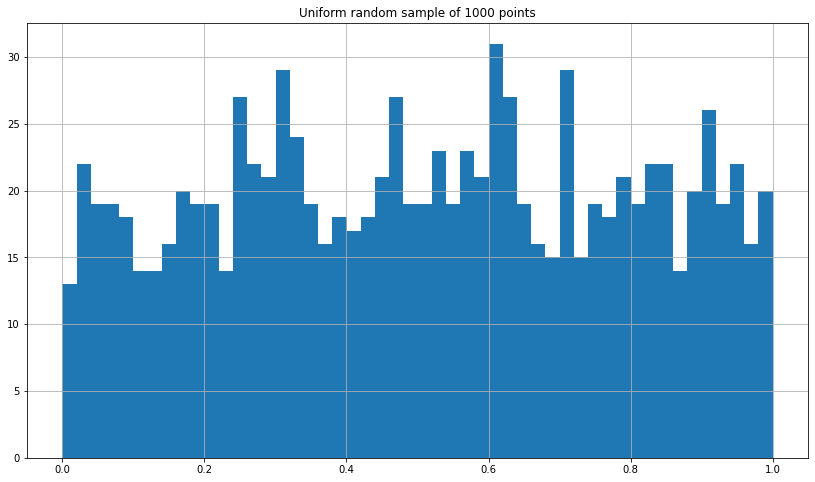

In [40]:
#lets sample uniform ]
plt.figure(figsize = (14,8))
sample = np.random.random(size = 1000)
plt.hist(sample, bins = 50)
plt.grid()
plt.title("Uniform random sample of 1000 points")
plt.show()

In [62]:
#[TITLE] lets start with a simple monte carlo simulation of S&P 500 

#download the stock
try:
    df = pd.read_csv("spx.csv", index_col = 0)
    
except:
    
    end = dt.date.today()
    start = dt.date(end.year - 1, end.month, end.day)
    df = yf.download("^GSPC", start, end)["Close"].to_frame()
    df.to_csv("spx.csv")

[*********************100%***********************]  1 of 1 completed


In [63]:
#make sure it looks right
df.head()

,Close
Date,
2021-01-28,3787.379883
2021-01-29,3714.239990
2021-02-01,3773.860107
2021-02-02,3826.310059
2021-02-03,3830.169922


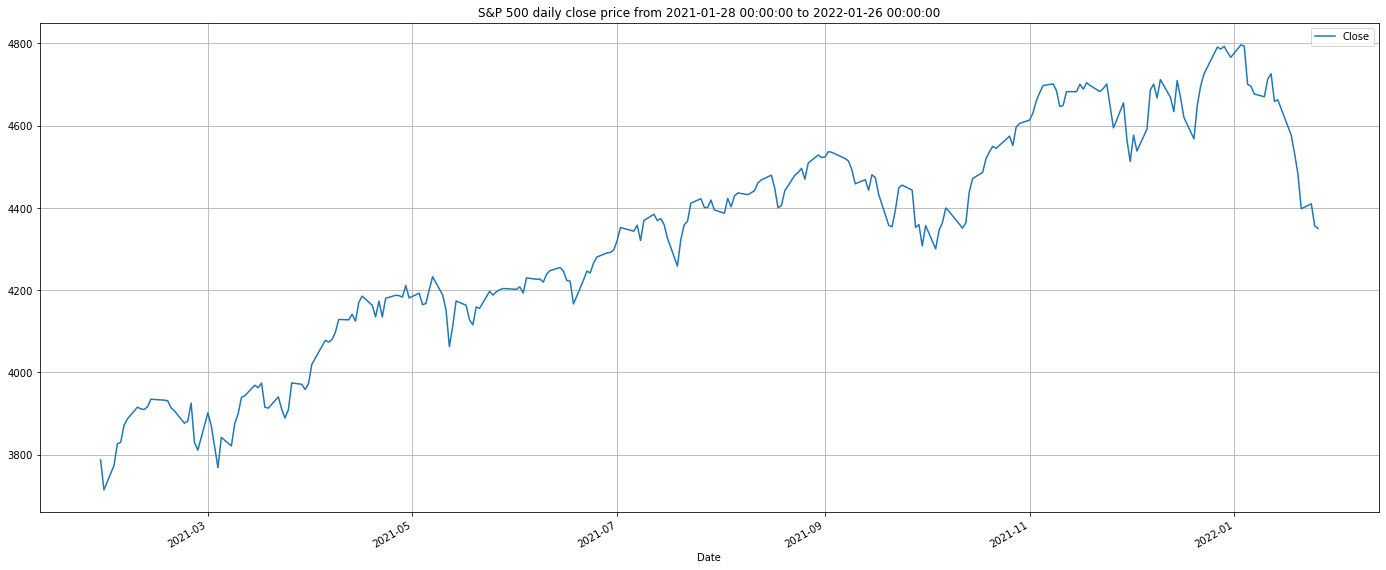

In [64]:
#let's plot it real quick
df.plot(figsize = (24,10))
plt.grid()
plt.title("S&P 500 daily close price from {} to {}".format(df.index[0], df.index[len(df) - 1]))
plt.show()

In [65]:
#now what we wnat to do is get the percent change
df["pct_change"] = df.pct_change()
df = df.dropna()
df.head()

,Close,pct_change
Date,,
2021-01-29,3714.239990,-0.019311
2021-02-01,3773.860107,0.016052
2021-02-02,3826.310059,0.013898
2021-02-03,3830.169922,0.001009
2021-02-04,3871.739990,0.010853


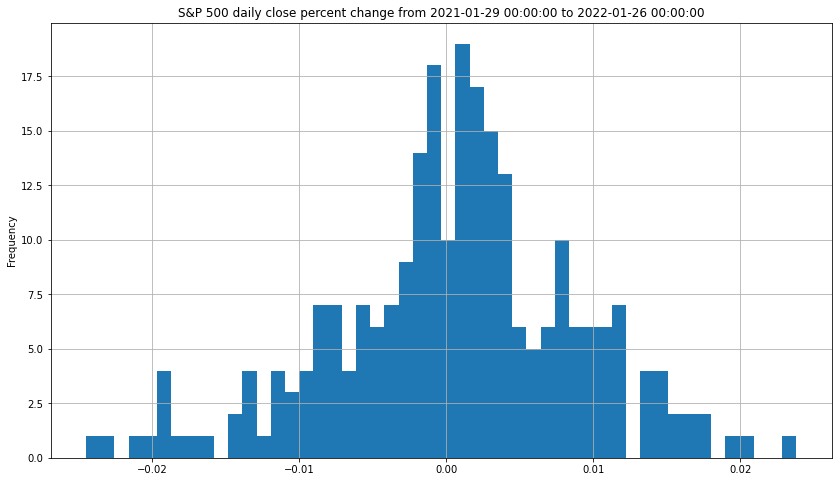

In [69]:
#let's plot that histogram of returns
df["pct_change"].plot(kind = "hist", figsize = (14,8), bins = 50)
plt.grid()
plt.title("S&P 500 daily close percent change from {} to {}".format(df.index[0], df.index[len(df) - 1]))
plt.show()

In [76]:
#monte carlo simulation

#get the statistics that are important we are making the assumption that the returns are normally distributed we can see from the plot above that it isn't normally distributed
mean = df["pct_change"].mean()
std = df["pct_change"].std()

print("mean: {}%".format(round(100 * mean,2)))
print("standard deviation:", round(std,2))

mean: 0.06%
standard deviation: 0.01


(array([ 96.,  98.,  89., 103.,  95., 112.,  95., 114.,  99.,  99.]),
 array([0.00250188, 0.10223721, 0.20197254, 0.30170788, 0.40144321,
        0.50117854, 0.60091387, 0.7006492 , 0.80038453, 0.90011987,
        0.9998552 ]),
 <BarContainer object of 10 artists>)

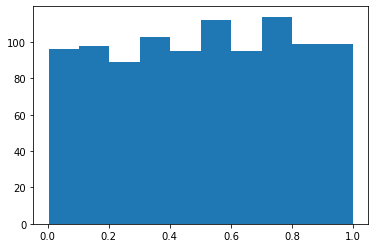

In [36]:
#geometric brownian motion
#ornstein Uhlnebeck Process
#https://towardsdatascience.com/monte-carlo-pricing-in-python-eafc29e3b6c9
#https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python
#https://medium.com/fintechexplained/monte-carlo-simulation-engine-in-python-a1fa5043c613
#https://towardsdatascience.com/stock-price-prediction-intervals-using-monte-carlo-simulation-6b52b8ac9c27
#check github

<tf.Tensor: shape=(100000,), dtype=float32, numpy=
array([ 71.843346,  88.22628 ,  77.198425, ...,  73.24064 ,  50.774788,
       -84.43019 ], dtype=float32)>

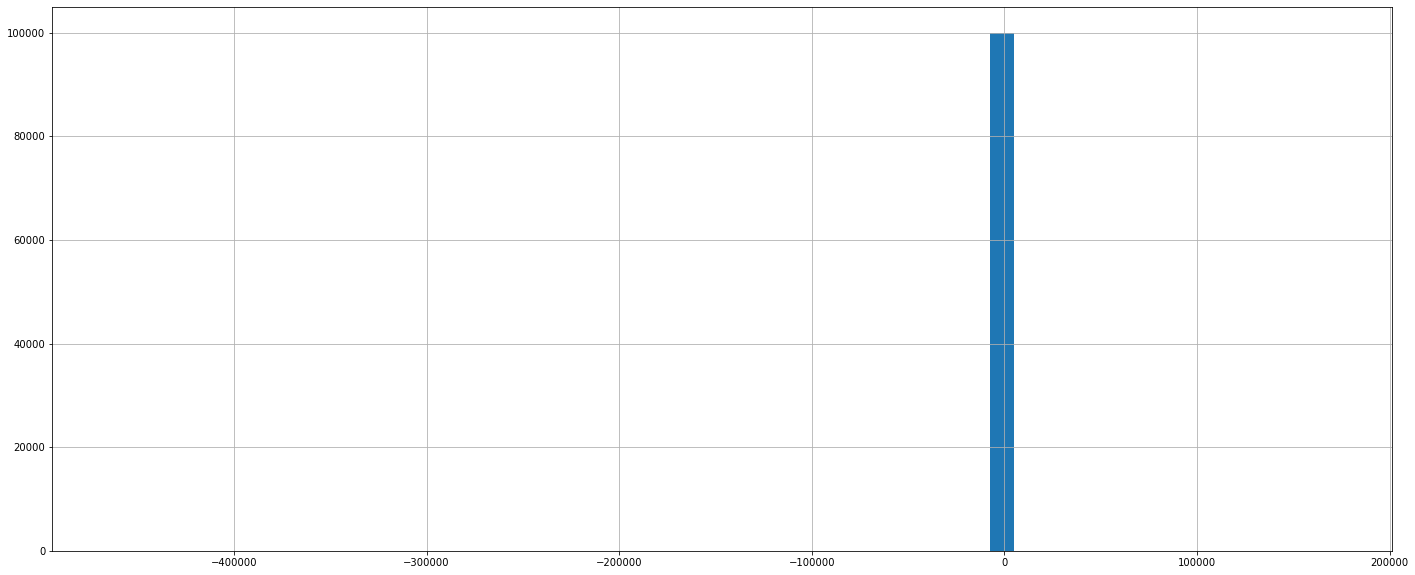